In [2]:
# === Import Library ===
import joblib
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt


In [3]:
# ===  Muat Model dan Vectorizer ===
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('model.pkl')


In [6]:
# === Siapkan Data Uji (Dummy Test Set) ===
# Gunakan data yang representatif dan tidak digunakan saat training

X_test = [
    "Saya sangat kecewa dengan pelayanan hari ini.",
    "Tempat ini sangat menyenangkan dan nyaman.",
    "Saya tidak suka makanannya.",
    "Pengalaman yang luar biasa dan menyentuh hati.",
    "Film ini sangat membosankan.",
    "Saya sangat senang menonton konser ini!"
]

y_test = [0, 1, 0, 1, 0, 1]  # 0 = Negatif, 1 = Positif


In [8]:
# ===  Transformasi Data Uji dan Prediksi ===
X_test_vectorized = vectorizer.transform(X_test)
y_pred = model.predict(X_test_vectorized)


In [10]:
# ===  Evaluasi Akurasi & Laporan Klasifikasi ===
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Positif"]))


Akurasi: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.75      1.00      0.86         3
     Positif       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



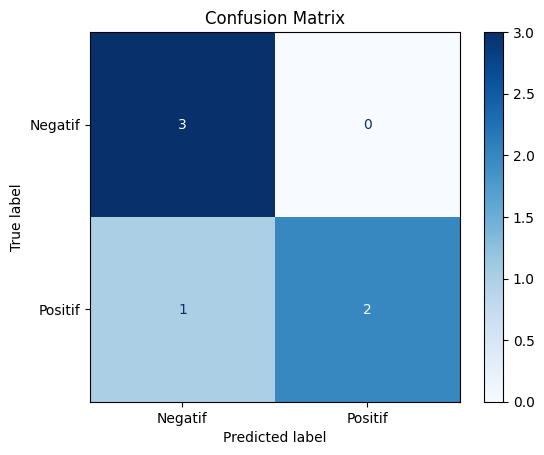

In [12]:
# ===  Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negatif", "Positif"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


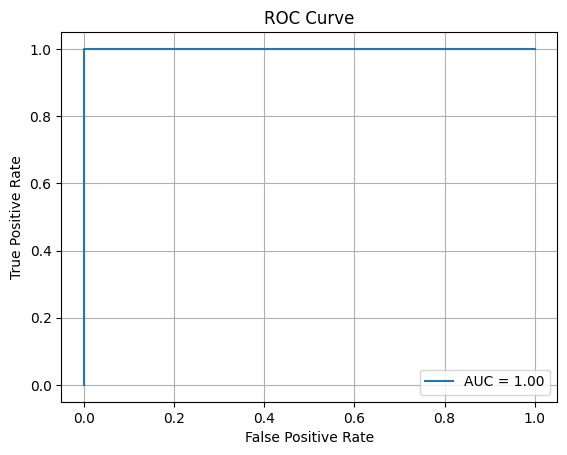

In [14]:
# ===  ROC Curve dan AUC (Jika model mendukung probabilitas) ===
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test_vectorized)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Model tidak mendukung prediksi probabilitas (predict_proba).")
